# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MDEV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MDEV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MDEV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [28]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.cross_validation import ShuffleSplit

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MDEV']
features = data.drop('MDEV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MDEV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MDEV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [29]:
#prices = data['MDEV']
"""
df = pd.DataFrame(data)
df2 = pd.DataFrame(prices)
test_min = df2.apply(lambda x: x.min())
test_max = df2.apply(lambda x: x.max())

print "minimum : ",test_min[0]
print "maximum : ",test_max[0]
"""
# TODO: Minimum price of the data
minimum_price = np.amin(prices)

# TODO: Maximum price of the data
maximum_price = np.amax(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of all Boston homeowners who have a greater net worth than homeowners in the neighborhood.
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MDEV'` or a **decrease** in the value of `'MDEV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: **
- The increase of RM value should increase the MDEV value because in this case we should apply the value of additional rooms in the calculation. An house with 7 rooms may be more expensive than one with 6 rooms.
- The increase of LSTAT should decrease the MDEV value because in this case the number of homeowners in BOSTON who have an higher income than the homeowners in question increases. So the value of the target homeowners houses decreases regarding other homeowners in BOSTON.
- The increase of PTRATIO should decrease the MDEV value. Indeed, a low value of PTRATIO means more teachers available and a good standard of life in the house neighborhood. Moreover teachers themselves should be potential buyers, with the goal to be closer to their school. This should lead to a higher value of the MDEV as consequence of the law of supply and demand.

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 always fails to predict the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. *A model can be given a negative R<sup>2</sup> as well, which indicates that the model is no better than one that naively predicts the mean of the target variable.*

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [30]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [31]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:**
As a model with an R2 of 1 perfectly predicts the target variable, I consider that this model with an R2 of 0.923 (very closer to 1) has successfully captured the variation of the target variable.

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [32]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=40)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: **
If you do not split the dataset in training and testing subsets, you can't have a way to test your data in fact to detect any bias (false positives) or variance (the distance between several measures of the model for a given data point).
Indeed, even if your model has a good variance (several measures are very closer for a same given data point) you should also ensure that the predicted values are those you expect. For exemple, it could be very dramatic if your model detect an innocent person as a criminal (false positives). So, the best way to make this tuning (test and improvement of the model) is to split data and test on.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

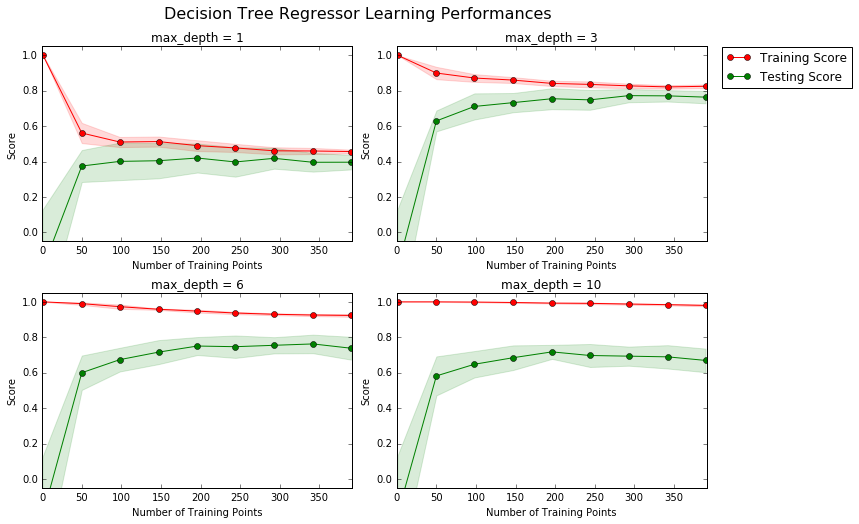

In [33]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: **

Let's consider the last graph (max_depth=10)
- For the highest value of the maximum depth (10) the performance of the training data is very good (very closer to 1) and decreases very slightly as more training points are added.
- But there is a lower performance on the test data. The distance of the performance between the training and test data is significant (about 0.4), and the learning curves do not converge to a constant value and are not closer.
- So here, the test on the test set will not represent the reality of training data.
- We see that when more training points are added, the testing score increases from 0 to over 0.6 and the training score decreases slightly. But the curves do not converge to a constant value. So I could say that here, even if we have an improvement of the testing scores, having more training points do not benefit the model, because the curves are divergent and as consequence the model will not well generalizes to unseen data.
- In conclusion, I think that the max_depth of 10 is not the better to choose for the model because the learning curves are not closer and they do not converge to a constant suitable value (closer to 1). It would be better to choose the second graph (max_depth=3), where the performance on both, training and test data is good. And the learning curves converge to a good performance (0.8) as more training points are added. So, in this case, the test on the test data will represent the reality of training data.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

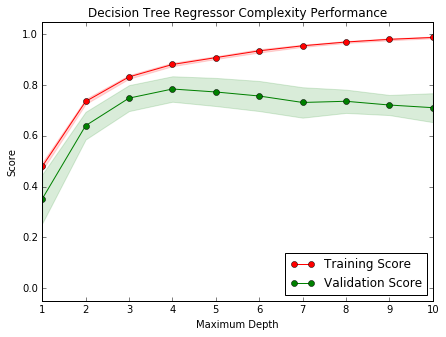

In [34]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: **
- When the model is trained with a maximum depth of 1, it suffer from high bias because in this case the training and validation scores are both very close to one another but relatively low (under 0.4), while the expected score correct value should be close to 1. We also note that the two curves are close and converge to the constant value of 0.4. This means that the predicted values produced by the model are far away from the expected correct value (their corresponding correct value in the data). So we are in a case of high bias.

- When the model is trained with a maximum depth of 10, it suffer from high variance. Indeed, in this case the validation score is low (close to 0.7) while the training score is very high (very close to 1). Moreover, the two curves do not converge to a constant value for the maximum depth of 10, but there is a distance (difference of score) of about 0.3 between them. This means that the predicted values produced by the model for a given data point would be all distant. Two or more measures of the same data point by the model should be all different and distant. So we are in a case of high variance.

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: **
Regarding the Complexity Curves, I see that the maximum depth of 4 is the max_depth where the validation R squared is maximized (very close to 0.8). Moreover at this point the training and validation curves are very close with a maximum gap of 0.1 (low variance).
- So, I think the maximum depth of 4 results in a model that best generalizes to unseen data.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: **
The grid search technique is a cross-validation method based on estimators such as Support Vector Machine (SVM) or Decision Tree Regressor parameters. It allow the use of multiple combinations of parameter tunes, cross-validating as it goes to determine which tune gives the best performance.
It tries all the parameter combinations and automatically returns the optimal parameter combination.
As the grid search technique automatically provide the best parameters, we have here a way to play a learning algorithm with its optimal parameters and produce optimal results.

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: **
- The **k-fold cross-validation training technique** is a way to **provide train/test indices to split data** in train test set, as for the *train_test_split* method.  
The difference is that **with the k-fold the tests are performed with the training data as input of the model**, instead of the raw data (whole data). So, **K-fold is an utility** which generates indices that can be used by grid search to generate dataset splits according to different cross validation strategies. 
The K-fold utility *uses different methods to perform his goal* :
  - `KFold`, which provides indices to divide all the samples in k groups of samples, called folds, of equal sizes (if possible).
  - `StratifiedKFold`, which is a variation of k-fold which provides indices to return stratified folds: each set contains approximately the same percentage of samples of each target class as the complete set.
  - `LabelKFold`, which is a variation of k-fold which provides indices to ensure that the same label is not in both testing and training sets.
- When performing test manually there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. So this could lead to a model that do not well generalizes to unseen data.
To solve this problem, it is necessary to proceed to a test on the training set, which automatically generates the best parameters. And after the experiment seems to be successful, final evaluation can be done on the test set. The grid search utility is used for this purpose (test on the training set).
When optimizing a model with grid search, the k-fold cross-validation training technique provides for grid search a set of indices (cross-validation sets from the training data) helpful to automatically generate the suitable structure of the training dataset splits, in fact to find the best parameters.
  - According to the value of k (in k-fold), the grid search : 
    - Generates a grid of hyper-parameter value combinations.
    - For every such combination, passes the model along with the current hyper-parameter values to the k-fold cross-validation routine and obtains a score.
    - Uses the scores produced by k-fold cross-validation to select the best model. The final score is an average of all the folds scores.
  - Here a hint on how the grid search exactly manages folds to obtain a score :
In k-fold cross-validation, *the original sample is randomly partitioned into k equal sized subsamples*. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k − 1 subsamples are used as training data. 
**Each time**, one of the k subsets is used as the test set and the other k-1 subsets are put together to form a training set.
The k results from the folds can then be averaged to produce a single estimation. 
    - Source 1 : https://www.cs.cmu.edu/~schneide/tut5/node42.html
    - Source 2 : https://en.wikipedia.org/wiki/Cross-validation_(statistics)#k-fold_cross-validation
  - So using grid search without a cross-validated set could lead to find bad parameters that do not well generalizes to unseen data. This is why to prevent the problem, grid search uses by default a 3-fold cross-validation.

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [35]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    #params = {"max_depth":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
    params = {"max_depth":range(1, 11)}
    

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [39]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


**Answer: **
The optimal model has a maximum depth of 4. This value is not the exact value I guessed in Question 6, but it is very closer (a value of 3).

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Household net worth (income) | Top 34th percent | Bottom 45th percent | Top 7th percent |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [40]:
# Produce a matrix for client data
client_data = [[5, 34, 15], # Client 1
               [4, 55, 22], # Client 2
               [8, 7, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $411,096.00
Predicted selling price for Client 2's home: $219,961.54
Predicted selling price for Client 3's home: $955,500.00


**Answer: **
My price recommendation, I give a small range for each of them according the predicted selling price, as the values are optimal. Considering the Complexity Curves, for a maximum depth of 4, the training score is about 0.9. So the error range is about 0.1 i.e about 10%. So I could propose my prices in this error range. If I apply this rigorously I have :
- Client 1 : [$369,986.40 - $452,205.60]
- Client 2 : [$197,965.39 - $241,957.70]
- Client 3 : [$859,950.00 - $1,051,050.00]
- Yes, I think these prices seem reasonable given the values for the respective features. They are all in the minimum and maximum price range and respect the feature observation in the question 1 :
  - The house predicted as the highest price also has the most rooms, and the lowest value of LSTAT and PTRATIO.
  - The house predicted as the lowest price also has the lowest number of rooms, and the highest value of LSTAT and PTRATIO.
  - The house predicted as the second price has an higher number of rooms, and a lower value of LSTAT and PTRATIO than the last one.

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [41]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $324,240.00
Trial 2: $346,500.00
Trial 3: $346,500.00
Trial 4: $420,622.22
Trial 5: $302,400.00
Trial 6: $411,931.58
Trial 7: $344,750.00
Trial 8: $407,232.00
Trial 9: $352,315.38
Trial 10: $316,890.00

Range in prices: $118,222.22


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: **

The constructed model is a good one because the prediction on the given dataset are very accurate. So it could be used in a real-world setting, in the corresponding environment like american town. It should also be applicable in other countries as the features are relevant there, even if their value will be different. But according to their characteristics, this model is not suitable for rural cities which should have different features. I think a feature such as PTRATIO is not relevant in a rural city; the number of teacher is generally fixed in these area. 
Moreover the feature 'MDEV' has been multiplicatively scaled to account for 35 years of market inflation and cover the period from 1978 to 2013.
So I think that the model should need some update and improvement to be robust enough to make consistent predictions today. We should review the number of features and add new one that are relevant nowadays. For example we could take into account the part of technology in the house building that could influencies the 'MDEV' value; if we have a smart house or not, ecologic house or not, etc.